# Stack Plots

Another common type of plot is a stackplot. This kind of plot is typically a way of displaying multiple series that each represent a quantity in the *same units*. The contribution of each of the series is "stacked" on top of the other so that the total across all components can be viewed clearly as well as the contribution of each unit. Let's create some simple data to show how this works. The data below come from the [United Nations World Population Prospects (Revision 2019)](https://population.un.org/wpp/) and was inspired by [this demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html) in the matplotlib gallery. Population is provided in billions of people.

In [28]:
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
region = ['Africa', 'The Americas', 'Asia', 'Europe', 'Oceania']
population = [
    [.228, .284, .365, .477, .631, .814, 1.044, 1.275],
    [.340, .425, .519, .619, .727, .840, .943, 1.006],
    [1.394, 1.686, 2.120, 2.625, 3.202, 3.714, 4.169, 4.560],
    [.220, .253, .276, .295, .310, .303, .294, .293],
    [.012, .015, .019, .022, .026, .031, .036, .039],
]


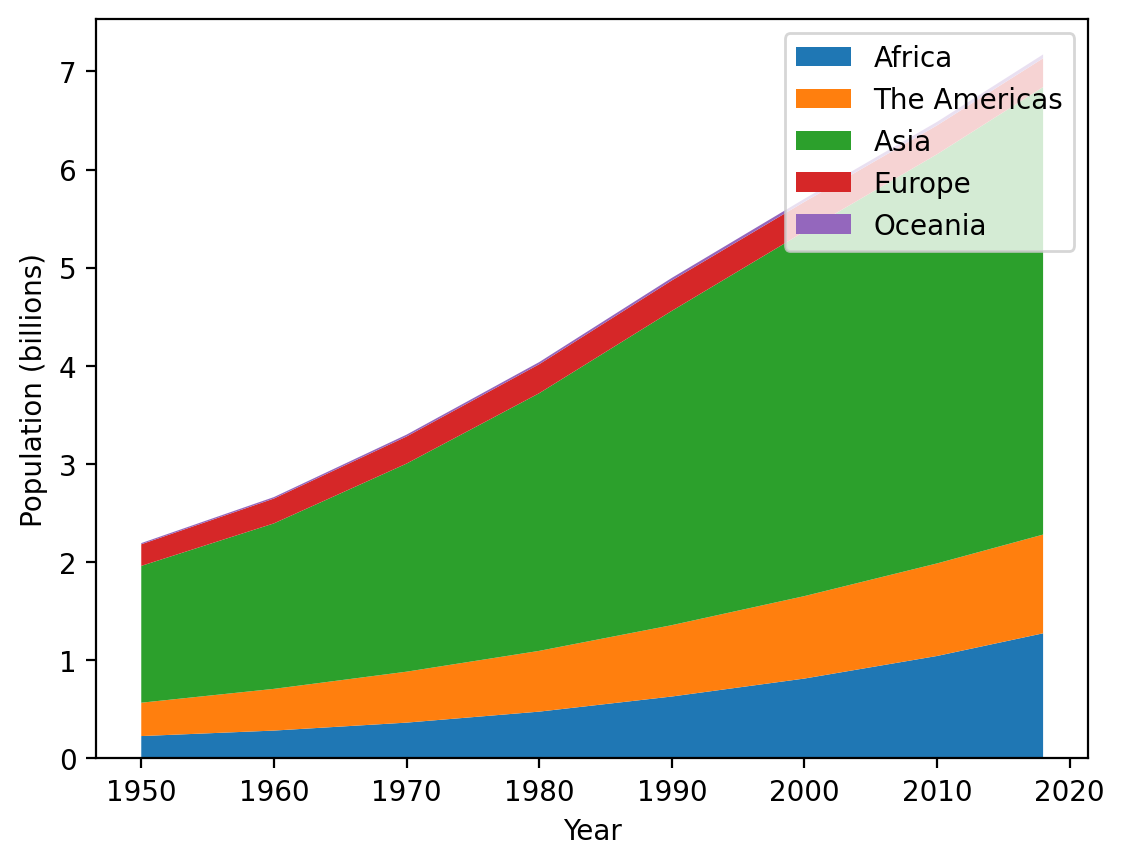

In [29]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.stackplot(year,population,labels=region)
ax.set_xlabel('Year')
ax.set_ylabel('Population (billions)')
ax.legend()

This gives a clear picture of how the overall population is changing as well as the relative contribution of each of the regions. Let's fix to minor issues with this plot: first of all, the legend overlaps the data - let's move that to the upper left. Second, the order of the legend entries is opposite to the order of the stacked elements, so let's reverse the legend entries order

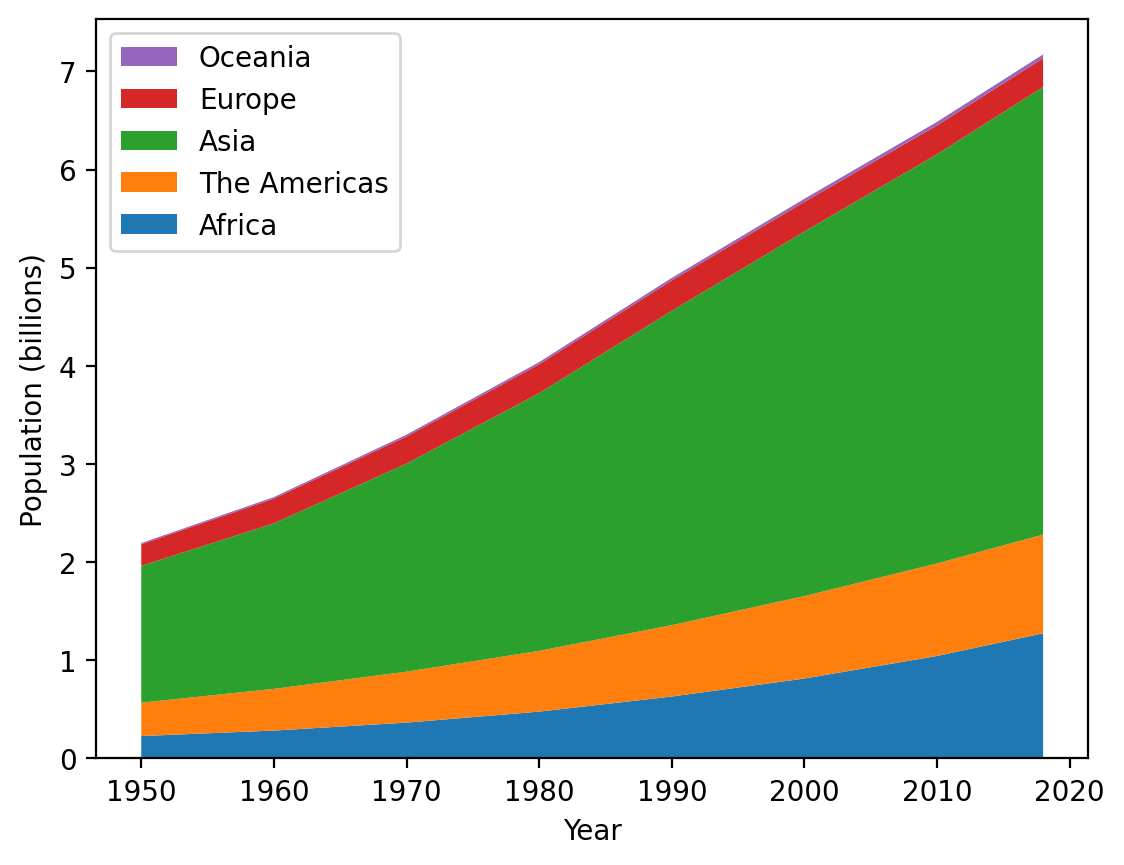

In [30]:
fig, ax = plt.subplots()

ax.stackplot(year,population,labels=region)
ax.set_xlabel('Year')
ax.set_ylabel('Population (billions)')
ax.legend(loc='upper left', reverse=True)

Much better. Now, one thing to notice, it's sometimes easier to see things stacked from largest to smallest - let's adjust the order in which we input the data such that Asia is first, then Africa, the Americas, Europe, and Oceania. We COULD do this manually, which wouldn't be hard for this dataset. Alternatively, we can make this switch by converting our data to numpy arrays and using indexing to reorder them:

In [31]:
import numpy as np
region = np.array(region)
order = [2,0,1,3,4]
region_updated = region[order]
region_updated

array(['Asia', 'Africa', 'The Americas', 'Europe', 'Oceania'],
      dtype='<U12')

Using this approach, we can create our updated stackplot:

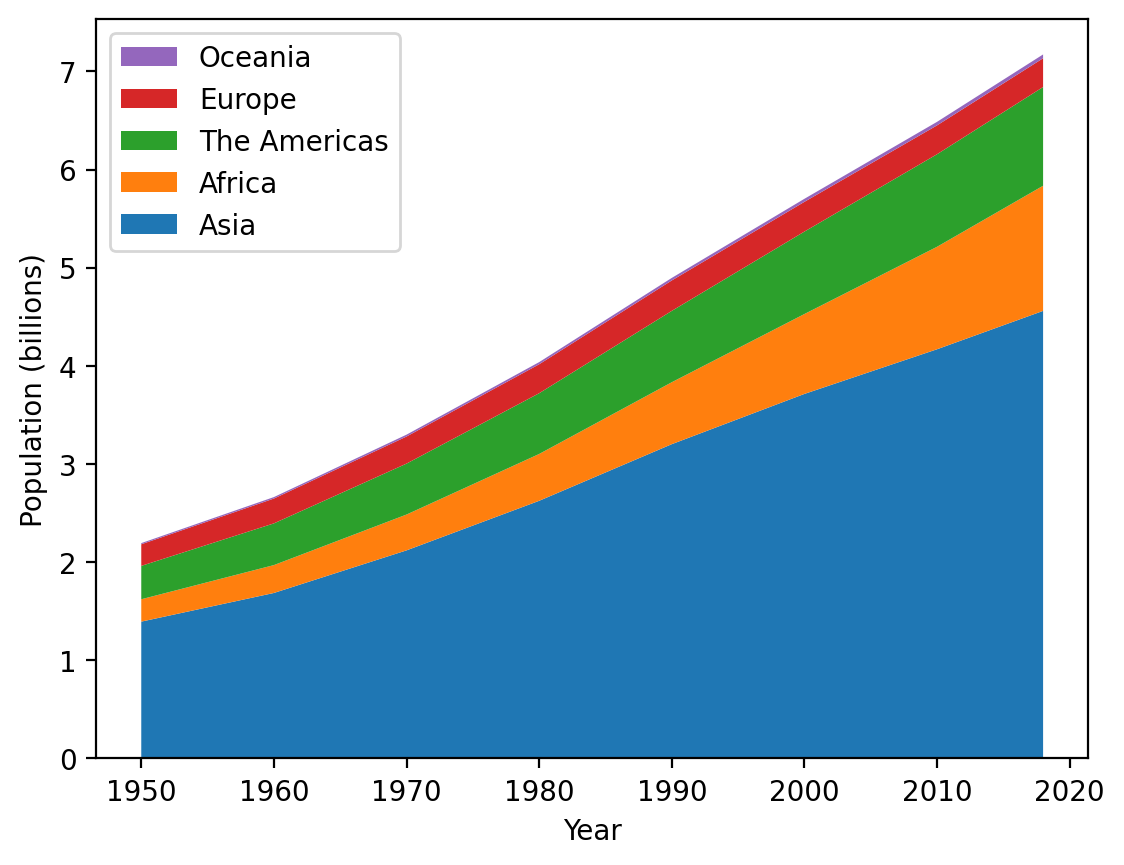

In [32]:
fig, ax = plt.subplots()

population = np.array(population)

ax.stackplot(year,population[order],labels=region[order])
ax.set_xlabel('Year')
ax.set_ylabel('Population (billions)')
ax.legend(loc='upper left', reverse=True)

Excellent! One final common use of stackplots is to show percentage breakdowns over time. Let's update this plot by adjusting the data so that for each year, the data are the percentage contribution to global contribution. This will allow us to more easily see how the shares of population change over time by region.

Let's adjust the population data so that it represents percentages by year. Rows represent regions and columns represent years, so we'll need to sum across rows and then divide each row by that sum, which will give us the fraction of population from each region. Then we'll multiply by 100 to convert that into a percentage.

In [33]:
population

array([[0.228, 0.284, 0.365, 0.477, 0.631, 0.814, 1.044, 1.275],
       [0.34 , 0.425, 0.519, 0.619, 0.727, 0.84 , 0.943, 1.006],
       [1.394, 1.686, 2.12 , 2.625, 3.202, 3.714, 4.169, 4.56 ],
       [0.22 , 0.253, 0.276, 0.295, 0.31 , 0.303, 0.294, 0.293],
       [0.012, 0.015, 0.019, 0.022, 0.026, 0.031, 0.036, 0.039]])

In [34]:
population_percentage = population / population.sum(axis=0) * 100
population_percentage

array([[10.39197812, 10.66466391, 11.06395878, 11.8127786 , 12.8880719 ,
        14.27569274, 16.09620722, 17.77498954],
       [15.49680948, 15.95944424, 15.73204001, 15.32937098, 14.84885621,
        14.7316731 , 14.53900709, 14.02481528],
       [63.53691887, 63.31205407, 64.26189754, 65.00742942, 65.4003268 ,
        65.13504034, 64.2769041 , 63.57172731],
       [10.02734731,  9.50056327,  8.36617157,  7.30559683,  6.33169935,
         5.31392494,  4.53283996,  4.0847623 ],
       [ 0.54694622,  0.5632745 ,  0.5759321 ,  0.54482417,  0.53104575,
         0.54366889,  0.55504163,  0.54370556]])

If this worked, every column should sum to 100:

In [35]:
population_percentage.sum(axis=0)

array([100., 100., 100., 100., 100., 100., 100., 100.])

Great! Now, let's create our updated plot using these data. We'll still retain the adjusted order of the regions from the last plot:

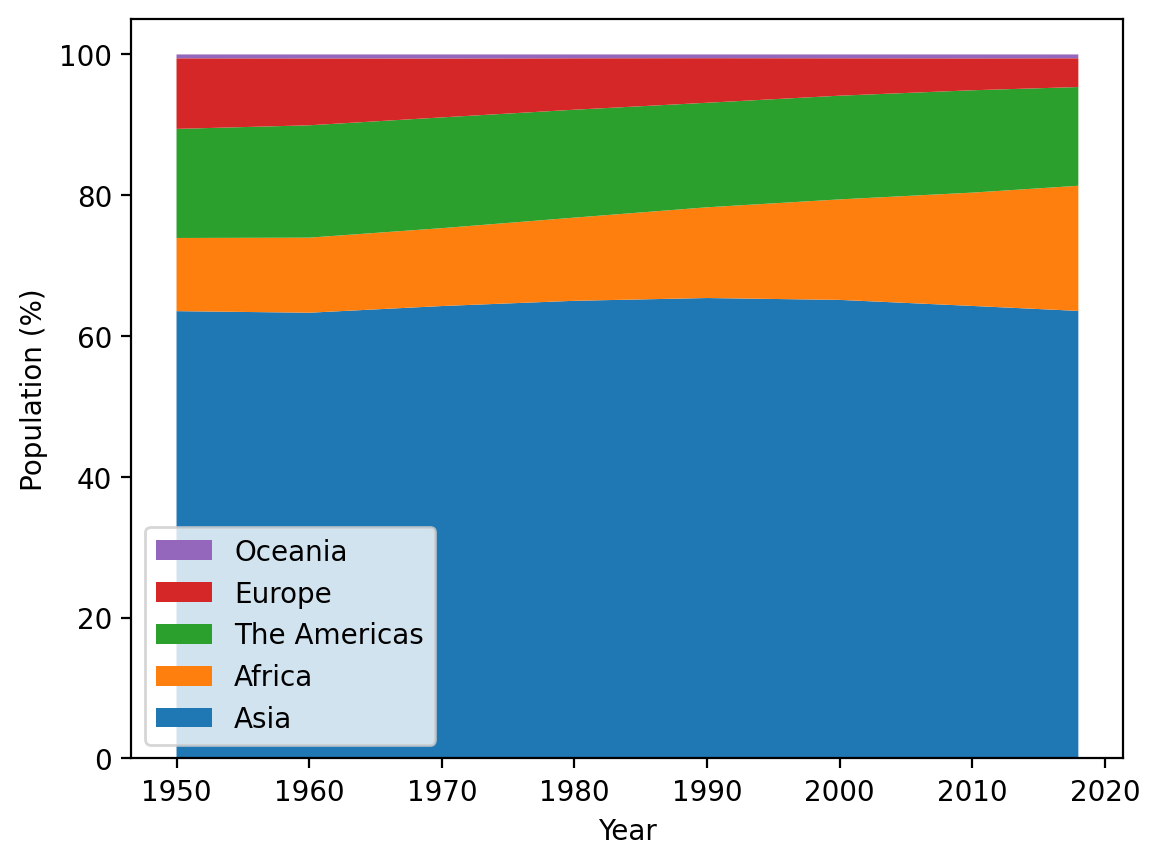

In [36]:
fig, ax = plt.subplots()

ax.stackplot(year,population_percentage[order],labels=region[order])
ax.set_xlabel('Year')
ax.set_ylabel('Population (%)')
ax.legend(loc='lower left', reverse=True)

While the overall population across the globe grew considerably from 1950 through 2018, the regional distribution of population changed less dramatically, with the greatest changes being decreasing shares of the global population from Europe and a substantially increasing share from Africa.

You'll revisit stackplots later in the course, but these are yet another tool in your ever-expanding plotting toolkit!